# Real Estate Data Analysis using Dask

### Step 1: Import Required Libraries

In [2]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
from dask.distributed import Client

### Step 2: Initialize Dask Client for Performance Monitoring

In [3]:
client = Client()
print(client)

C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52904 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:52907' processes=4 threads=16, memory=15.70 GiB>


### Step 3: Load Dataset

#### Load dataset using Pandas for initial inspection

In [4]:
dtype_mapping = {
    'Alley': 'object',
    'PoolQC': 'object'
}
df_pandas = pd.read_csv("train.csv")
df_dask = dd.read_csv("train.csv", assume_missing=True, dtype=dtype_mapping)
print("Dask DataFrame Sample:")
print(df_dask.head())

Dask DataFrame Sample:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  <NA>      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  <NA>      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  <NA>      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  <NA>      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  <NA>      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...      0.0   <NA>  <NA>        <NA>     0.0    2.0   
1         Lvl    AllPub  ...      0.0   <NA>  <NA>        <NA>     0.0    5.0   
2         Lvl    AllPub  ...      0.0   <NA>  <NA>        <NA>     0.0    9.0   
3         Lvl    AllPub  ...      0.0   <NA>  <NA>        <NA>     0.0    2.0   
4         Lvl    AllPub  ...      0.0   <NA>  <NA>        <NA>     0.0   12.0   

   YrSold  SaleType  SaleCondition  Sal

### Step 4: Data Preprocessing

#### Drop rows with missing values in important columns

In [11]:
cleaned_df = df.dropna(subset=["SalePrice", "MSZoning"])

NameError: name 'df' is not defined

#### Compute the cleaned dataframe

In [12]:
df_dask['Alley'] = df_dask['Alley'].fillna('None')  
df_dask['PoolQC'] = df_dask['PoolQC'].fillna('None')


cleaned_df = df_dask.compute()
print("Data after cleaning:")
print(cleaned_df.head())


Data after cleaning:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...      0.0   None  <NA>        <NA>     0.0    2.0   
1         Lvl    AllPub  ...      0.0   None  <NA>        <NA>     0.0    5.0   
2         Lvl    AllPub  ...      0.0   None  <NA>        <NA>     0.0    9.0   
3         Lvl    AllPub  ...      0.0   None  <NA>        <NA>     0.0    2.0   
4         Lvl    AllPub  ...      0.0   None  <NA>        <NA>     0.0   12.0   

   YrSold  SaleType  SaleCondition  SaleP

### Step 5: Perform Analysis

#### Calculate the average SalePrice by MSZoning

In [7]:
avg_price_by_zone = cleaned_df.groupby("MSZoning")["SalePrice"].mean()
print("Average Sale Price by Zoning:")
print(avg_price_by_zone)

Average Sale Price by Zoning:
MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64


### Step 6: Generate Insights with Visualization

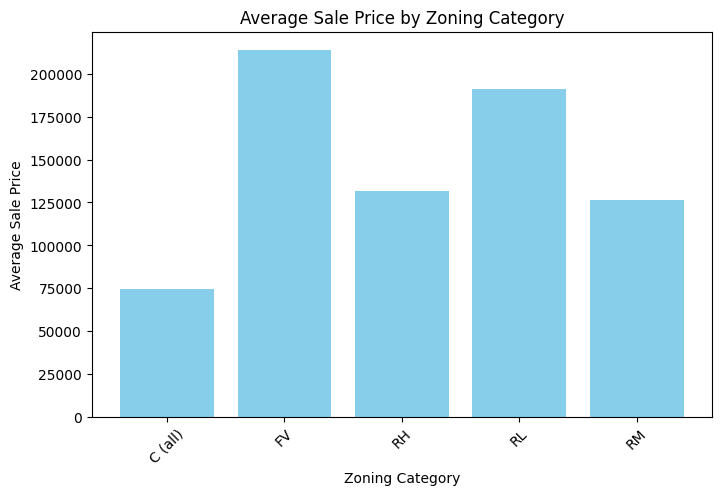

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(avg_price_by_zone.index, avg_price_by_zone.values, color='skyblue')
plt.xlabel("Zoning Category")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Zoning Category")
plt.xticks(rotation=45)
plt.show()

### Step 7: Summary of Insights

In [9]:
print("Key Insights:")
print("1. The dataset contains different zoning categories impacting sale prices.")
print("2. The bar chart illustrates how average sale prices vary by zoning.")

Key Insights:
1. The dataset contains different zoning categories impacting sale prices.
2. The bar chart illustrates how average sale prices vary by zoning.


### Stop the Dask Client

In [10]:
client.close()
print("Dask client stopped.")

Dask client stopped.
